# Machine Learning: Logistic Regression

## 0 Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, recall_score, matthews_corrcoef, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("../dat/dips/DIPS_Data_cleaned.csv", sep = ",", low_memory = False)
data_pred = pd.read_csv("../dat/dips/DIPS_Data_cleaned_pred.csv", sep = ",", low_memory = False)
data_pred_y = pd.read_csv("../dat/dips/DIPS_Data_cleaned_pred_y.csv", sep = ",", low_memory = False)

## 1 Logistic Regression

In [23]:
# Predictors
X = data
X = X.drop(["hpi"], axis = 1)

# Target
y = data["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape, "\n", "X_test shape: ", X_test.shape, "\n", "y_train shape: ", y_train.shape,
      "\n", "y_test shape: ", y_test.shape)

X_train shape:  (983, 35) 
 X_test shape:  (246, 35) 
 y_train shape:  (983,) 
 y_test shape:  (246,)


In [24]:
def sklearn_log_regression(x_test_log, x_train_log, y_train_log, y_test_log):
    """Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights, testset predictions and accuracy.
    """

    # linear regression model
    model = linear_model.LogisticRegression(fit_intercept = True, max_iter = 10000, penalty = None)

    # fitting it on the training data
    model.fit(x_train_log, y_train_log)

    # 1: ESTIMATING WEIGHTS
    weights_log = model.coef_
    features_log = model.feature_names_in_

    # 2: COMPUTE TEST SET PREDICTIONS
    y_pred_log = model.predict(x_test_log)

    # 3: COMPUTE METRICS
    accuracy_log = model.score(x_test_log, y_test_log)
    macro_f1_log = recall_score(y_test_log, y_pred_log, average = "macro")
    micro_f1_log = recall_score(y_test_log, y_pred_log, average = "micro")
    mcc_log = matthews_corrcoef(y_test_log, y_pred_log)

    # 4: COMPUTE CONFUSION MATRIX
    cm_log = confusion_matrix(y_test_log, y_pred_log)
    precision_log = cm_log[1][1] / (cm_log[1][1] + cm_log[0][1])
    recall_log = cm_log[1][1] / (cm_log[1][1] + cm_log[1][0])

    # store metrics in a dictionary
    metrics_log = {
        "accuracy": round(accuracy_log, 4),
        "macro_f1": round(macro_f1_log, 4),
        "micro_f1": round(micro_f1_log, 4),
        "mcc": round(mcc_log, 4),
        "precision": round(precision_log, 4),
        "recall": round(recall_log, 4),
        "confusion_matrix": cm_log
    }

    # heatmap of confusion matrix
    # plt.figure(figsize = (3, 3))
    # sns.heatmap(cm_log, annot = True, fmt = "d", cmap = "Blues", cbar = False)
    # plt.xlabel("Predicted")
    # plt.ylabel("True")
    # plt.title("Confusion Matrix for Logistic Regression")
    # plt.show()

    return weights_log, y_pred_log, features_log, metrics_log

In [25]:
def sklearn_log_lasso(x_test_l, x_train_l, y_train_l, y_test_l):
    """Computes OLS weights for linear regression with lasso regularization using the sklearn library on the training set and
       returns weights, testset predictions and accuracy.
    """

    # linear regression model
    model = linear_model.LogisticRegression(fit_intercept = True, max_iter = 1000000, penalty = "l1", solver = "saga", C = 2)

    # fitting it on the training data
    model.fit(x_train_l, y_train_l)

    # 1: ESTIMATING WEIGHTS
    weights_l = model.coef_
    features_l = model.feature_names_in_

    # 2: COMPUTE TEST SET PREDICTIONS
    y_pred_l = model.predict(x_test_l)

    # 3: COMPUTE METRICS
    accuracy_l = model.score(x_test_l, y_test_l)
    macro_f1_l = recall_score(y_test_l, y_pred_l, average = "macro")
    micro_f1_l = recall_score(y_test_l, y_pred_l, average = "micro")
    mcc_l = matthews_corrcoef(y_test_l, y_pred_l)

    # 4: COMPUTE CONFUSION MATRIX
    cm_l = confusion_matrix(y_test_l, y_pred_l)
    precision_l = cm_l[1][1] / (cm_l[1][1] + cm_l[0][1])
    recall_l = cm_l[1][1] / (cm_l[1][1] + cm_l[1][0])

    # store metrics in a dictionary
    metrics_l = {
        "accuracy": round(accuracy_l, 4),
        "macro_f1": round(macro_f1_l, 4),
        "micro_f1": round(micro_f1_l, 4),
        "mcc": round(mcc_l, 4),
        "precision": round(precision_l, 4),
        "recall": round(recall_l, 4),
        "confusion_matrix": cm_l
    }

    # heatmap of confusion matrix
    # plt.figure(figsize = (3, 3))
    # sns.heatmap(cm_l, annot = True, fmt = "d", cmap = "Blues", cbar = False)
    # plt.xlabel("Predicted")
    # plt.ylabel("True")
    # plt.title("Confusion Matrix for Lasso Logistic Regression")
    # plt.show()

    return weights_l, y_pred_l, features_l, metrics_l

In [26]:
weights_lr, y_pred_lr, features_lr, metrics_lr = sklearn_log_regression(X_test, X_train, y_train, y_test)
weights_lasso, y_pred_lasso, features_lasso, metrics_lasso = sklearn_log_lasso(X_test, X_train, y_train, y_test)

In [27]:
metrics_lr

{'accuracy': 0.6911,
 'macro_f1': 0.5657,
 'micro_f1': 0.6911,
 'mcc': np.float64(0.1848),
 'precision': np.float64(0.5484),
 'recall': np.float64(0.2152),
 'confusion_matrix': array([[153,  14],
        [ 62,  17]])}

In [28]:
metrics_lasso

{'accuracy': 0.6789,
 'macro_f1': 0.5534,
 'micro_f1': 0.6789,
 'mcc': np.float64(0.1481),
 'precision': np.float64(0.5),
 'recall': np.float64(0.2025),
 'confusion_matrix': array([[151,  16],
        [ 63,  16]])}

In [29]:
# plot feature importance
def plot_feature_importance(weights, features, title):
    """Plot feature importance for linear regression model"""
    # get absolute value of weights
    weights = np.abs(weights)

    # create dataframe
    df = pd.DataFrame({"features": features, "weights": weights[0]})

    # sort by weights
    df = df.sort_values(by = "weights", ascending = False)

    # plot
    plt.figure(figsize = (10, 10))
    sns.barplot(x = "weights", y = "features", data = df)
    plt.title(title)
    plt.show()

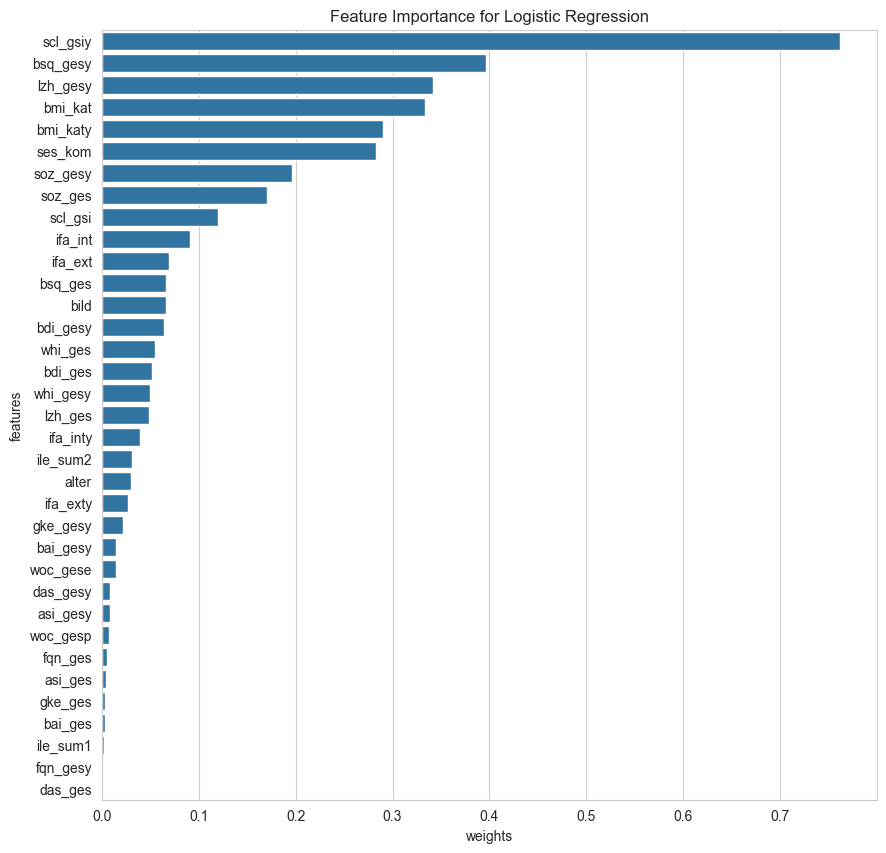

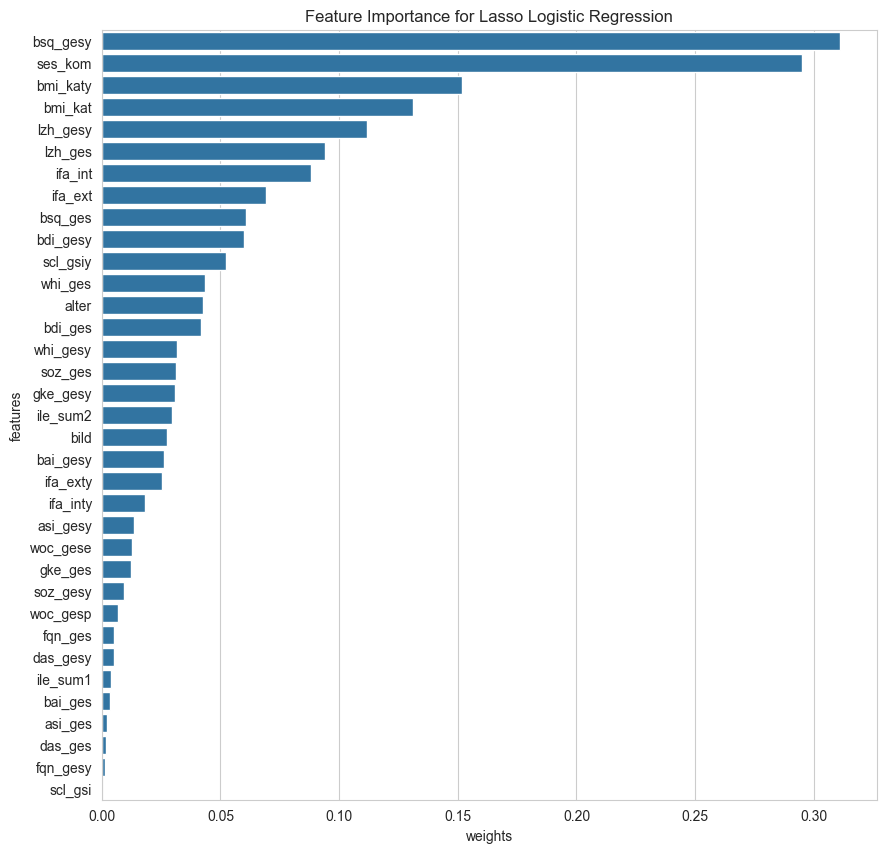

In [30]:
plot_feature_importance(weights_lr, features_lr, "Feature Importance for Logistic Regression")
plot_feature_importance(weights_lasso, features_lasso, "Feature Importance for Lasso Logistic Regression")

In [31]:
# plot feature importance in one plot
def plot_feature_importance_combined(weights_lr, features_lr, weights_lasso, features_lasso):
    """Plot feature importance for linear regression model"""
    # get absolute value of weights
    weights_lr = np.abs(weights_lr)
    weights_lasso = np.abs(weights_lasso)

    # create dataframe
    df_lr = pd.DataFrame({"features": features_lr, "weights": weights_lr[0], "model": "Logistic Regression"})
    df_lasso = pd.DataFrame({"features": features_lasso, "weights": weights_lasso[0], "model": "Lasso Logistic Regression"})

    # combine dataframes
    df = pd.concat([df_lr, df_lasso])

    # sort by weights
    df = df.sort_values(by = "weights", ascending = False)

    # plot
    plt.figure(figsize = (10, 10))
    sns.barplot(x = "weights", y = "features", hue = "model", data = df)
    plt.title("Feature Importance for Logistic Regression and Lasso Logistic Regression")
    plt.show()

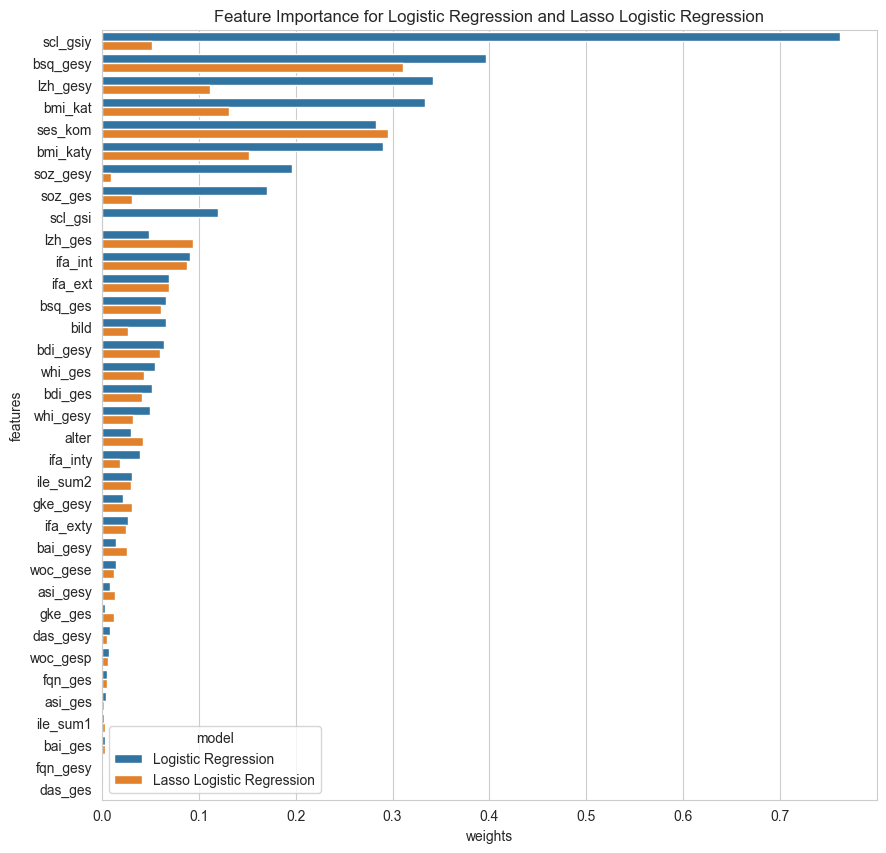

In [32]:
plot_feature_importance_combined(weights_lr, features_lr, weights_lasso, features_lasso)